In [1]:
# Import personality Insgihts SDK
from watson_developer_cloud import PersonalityInsightsV3

In [2]:
# Import json
import json

In [3]:
# Change this with your IBM Watson Personality Insights Key
url = 'your-ibm-watson-perosnality-insights-url'
apikey = 'your-ibm-watson-perosnality-insights-apikey'

In [4]:
service = PersonalityInsightsV3(url=url , iam_apikey=apikey , version='2017-10-13' )

<ipython-input-4-a8bfc5d5b7ea>:1: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  service = PersonalityInsightsV3(url=url , iam_apikey=apikey , version='2017-10-13' )


In [7]:
with open('profile.txt', 'r') as file:
  text = file.read()

In [8]:
profile = service.profile(text, content_type='text/plain').get_result()

In [9]:
print(json.dumps(profile, indent=2))

{
  "word_count": 1365,
  "processed_language": "en",
  "personality": [
    {
      "trait_id": "big5_openness",
      "name": "Openness",
      "category": "personality",
      "percentile": 0.9970814244982862,
      "significant": true,
      "children": [
        {
          "trait_id": "facet_adventurousness",
          "name": "Adventurousness",
          "category": "personality",
          "percentile": 0.7897453561510404,
          "significant": true
        },
        {
          "trait_id": "facet_artistic_interests",
          "name": "Artistic interests",
          "category": "personality",
          "percentile": 0.9946576519208276,
          "significant": true
        },
        {
          "trait_id": "facet_emotionality",
          "name": "Emotionality",
          "category": "personality",
          "percentile": 0.7671631753694048,
          "significant": true
        },
        {
          "trait_id": "facet_imagination",
          "name": "Imagination",
      

In [10]:
profile.keys()

dict_keys(['word_count', 'processed_language', 'personality', 'needs', 'values', 'warnings'])

# visualization of insights 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
result = {need['name']:need['percentile'] for need in profile['needs']}
df = pd.DataFrame.from_dict(result, orient='index')
df.reset_index(inplace=True)
df.columns = ['need', 'percentile']

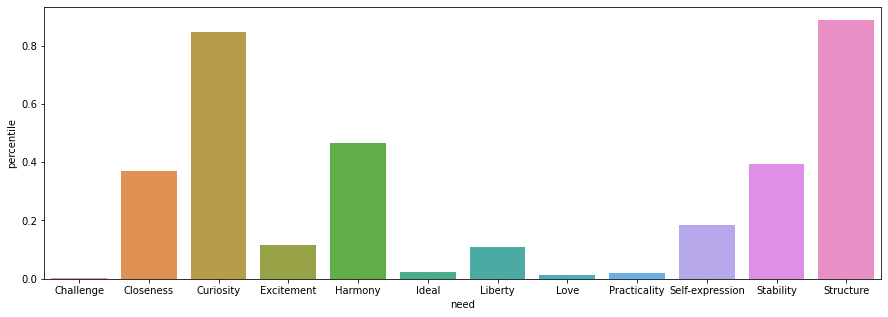

In [13]:
plt.figure(figsize=(15, 5))
sns.barplot(y='percentile', x='need', data=df)
plt.show()

In [18]:
# plotting function
def create_trait_plots(traits):
    result = {trait['name']: trait['percentile'] for trait in traits}
    df = pd.DataFrame.from_dict(result, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['name', 'percentile']
    plt.figure(figsize=(15,5))
    sns.barplot(y='percentile', x='name', data=df)
    plt.show()

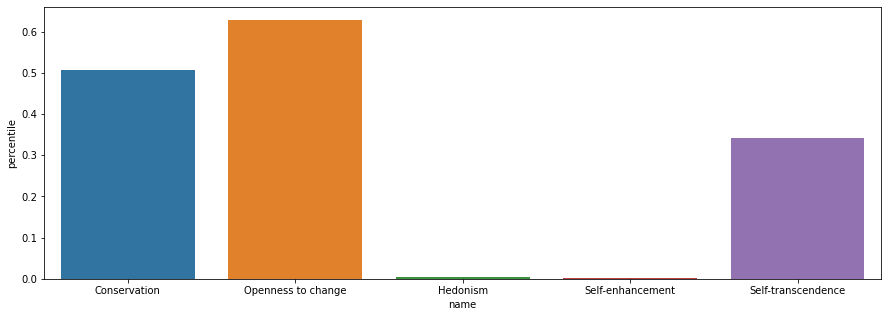

In [19]:
create_trait_plots(profile['values'])

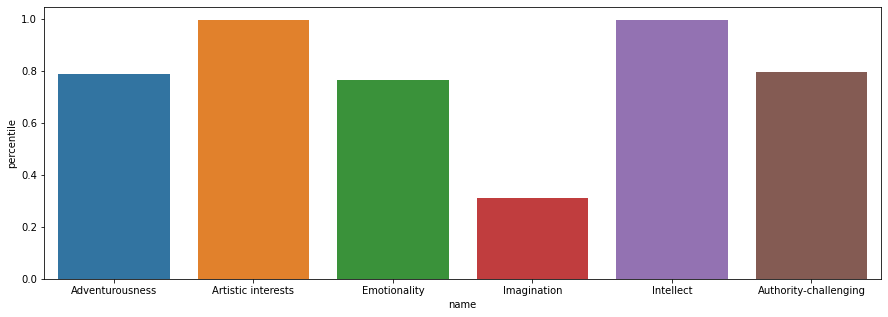

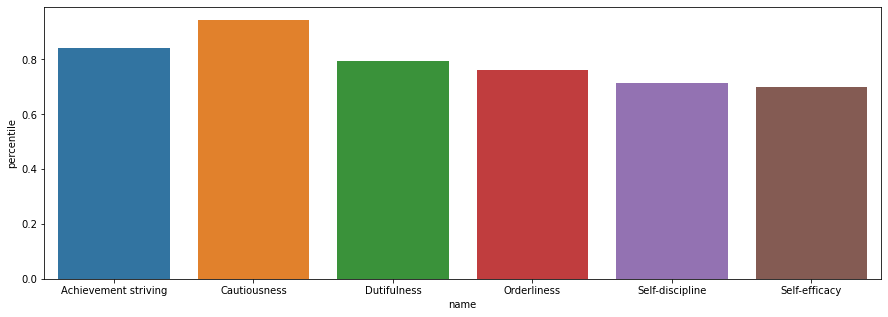

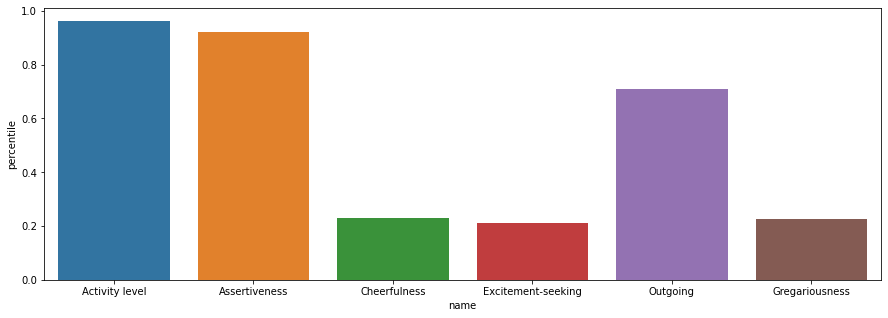

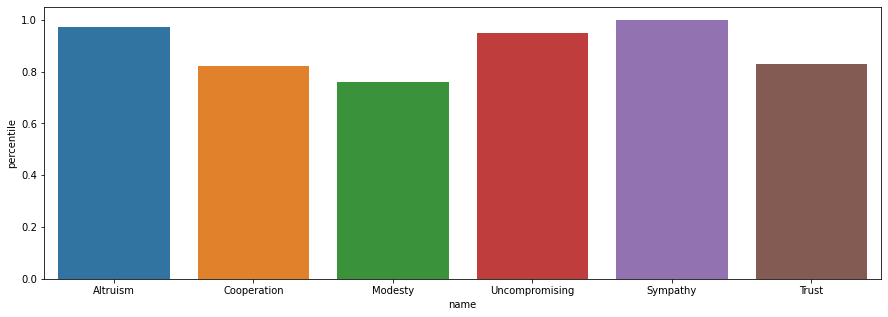

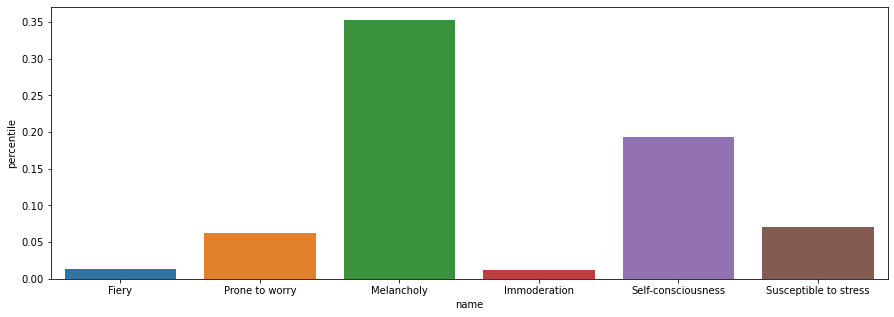

[None, None, None, None, None]

In [20]:
[ create_trait_plots(big5['children']) for big5 in profile['personality']]